In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [6]:
#DataFrame manipulation
data = pd.read_json("data/train.json")
data = data.set_index("id")
data = data.sort_values("id")
data.head()

,cuisine,ingredients
id,,
0,spanish,"[mussels, ground black pepper, garlic cloves, ..."
1,mexican,"[tomatoes, diced red onions, paprika, salt, co..."
2,french,"[chicken broth, truffles, pimentos, green pepp..."
3,chinese,"[fresh ginger, sesame oil, frozen peas, cooked..."
4,italian,"[orange peel, cookies, vanilla ice cream, gran..."


In [7]:
data.dtypes

cuisine        object
ingredients    object
dtype: object

In [8]:
data.isnull().sum()

cuisine        0
ingredients    0
dtype: int64

Number of Cuisines : 20
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


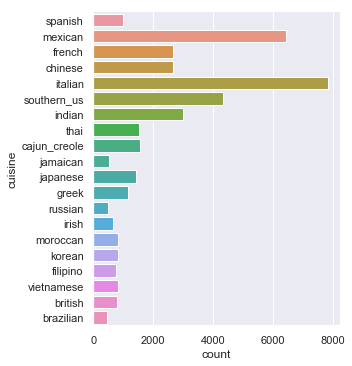

In [10]:
# Cuisines in the Dataset
print("Number of Cuisines :", len(data["cuisine"].unique()))

# Recipes in each cuisine
print(data["cuisine"].value_counts())
sb.catplot(y = "cuisine", data = data, kind = "count")

In [17]:
#Finding the different ingredients stored in the data
from collections import Counter
from itertools import chain, combinations
counted_ingredients = Counter(chain.from_iterable(data.ingredients.tolist())) # Builds a counter to count the occurences of each single ingredient
single_ingredients = list(counted_ingredients.keys()) # Builds a list will all single ingredients
n_single_ingredients = len(single_ingredients) # Counts the number of single ingredients
print("Number of single ingredients = " + str(n_single_ingredients) + "\n")

specific_ingredients = {} # Will be a dict of lists
sorted_ingredients = {} # Will be a dict of Counters
sorted_not_specific_ingredients = {} # Will be a dict of lists
not_specific_ingredients = single_ingredients # Will be a list

for cuisine in single_cuisines :
    sorted_ingredients[cuisine] = Counter(chain.from_iterable(data[data.cuisine == cuisine].ingredients.tolist()))
    other_cuisines_ingredients = Counter(chain.from_iterable(data[data.cuisine != cuisine].ingredients.tolist()))
    intersection  = Counter(sorted_ingredients[cuisine]) & Counter(other_cuisines_ingredients)
    specific_ingredients[cuisine] = list(sorted_ingredients[cuisine] - intersection)
    not_specific_ingredients = list(Counter(not_specific_ingredients) - Counter(specific_ingredients[cuisine]))
    sorted_not_specific_ingredients[cuisine] = list(sorted_ingredients[cuisine] - Counter(specific_ingredients[cuisine]))
    # Print info about current cuisine
    print(cuisine + " cuisine: " + str(len(specific_ingredients[cuisine])) + " specific ingredients, "+ str(len(sorted_ingredients[cuisine])) + "  different ingredients")
 
sum_specific_ingredients = sum(len(v) for v in specific_ingredients.values())
sum_not_specific_ingredients = len(not_specific_ingredients)

print("\n" + str(sum_specific_ingredients) + " ingredients are specific to one cuisine and \n" + str(sum_not_specific_ingredients)+" ingredients are not specific to one cuisine")

Number of single ingredients = 6714

spanish cuisine: 64 specific ingredients, 1263  different ingredients
mexican cuisine: 716 specific ingredients, 2684  different ingredients
french cuisine: 288 specific ingredients, 2102  different ingredients
chinese cuisine: 317 specific ingredients, 1792  different ingredients
italian cuisine: 852 specific ingredients, 2929  different ingredients
southern_us cuisine: 446 specific ingredients, 2462  different ingredients
indian cuisine: 270 specific ingredients, 1664  different ingredients
thai cuisine: 121 specific ingredients, 1376  different ingredients
cajun_creole cuisine: 148 specific ingredients, 1576  different ingredients
jamaican cuisine: 42 specific ingredients, 877  different ingredients
japanese cuisine: 213 specific ingredients, 1439  different ingredients
greek cuisine: 86 specific ingredients, 1198  different ingredients
russian cuisine: 56 specific ingredients, 872  different ingredients
irish cuisine: 49 specific ingredients, 99